### (1a)

In [1]:
import pandas as pd
import numpy as np

# Importing our data using pandas
data = pd.read_csv("facerecognition.dat", delimiter=" ")

# Book defines our y to be a 1 or 0 (the match) and z as the absolute difference in eye region pixel intensity (eyediff)
y = data['match'].to_numpy().reshape(1042,1)
z = data['eyediff'].to_numpy().reshape(1042,1)

# We need our z matrix to be a certain dimension for when we multiply it by beta
# To do this, we will create a column of ones and add them together
ones = np.ones((1042,1))
z = np.hstack((ones,z))

# Number of rows in our data set
n = y.size

# Newton updating equation for beta
def update_beta(beta,W,Z,y,pi,Hessian):
    return beta + Hessian.dot((np.transpose(Z).dot((y-pi))))

# Updating equation for pi with each iteration
def update_pi(Z,beta):
    return 1/(1+np.exp(-Z.dot(beta)))

# Defining our starting beta array
beta1 = np.array([0.95913,0]).reshape(2,1)

# Defining a starting matrix filled with 0's
W = np.zeros((n,n))

# Looping through and calculating pi and inputting it into our diagonal matrix
beta1_values = []
beta_xa = []
beta_ya = []
iterations = []
appendedlist = []
beta1_values.append(beta1)
for i in range(5):
    iterations.append(i)
    beta1_values.append(beta1)
    beta_xa.append(beta1_values[i][0])
    beta_ya.append(beta1_values[i][1])
    pi = update_pi(z,beta1)
    np.fill_diagonal(W,pi*(1-pi))
    Hessian = np.linalg.inv(np.linalg.multi_dot((np.transpose(z),W,z)))
    data_value = [i,beta1,Hessian]
    appendedlist.append(data_value)
    beta1 = update_beta(beta1,W,z,y,pi,Hessian)
    
print("Table for Beta_0=0.95913, Beta_1=0")
df = pd.DataFrame(appendedlist, columns = ['Iteration,t','Beta','Hessian'])
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

Table for Beta_0=0.95913, Beta_1=0


"Iteration,t",Beta,Hessian
0,[[0.95913] [0. ]],[[ 0.01096355 -0.11774922] [-0.11774922 2.24636741]]
1,[[ 1.72028763] [-13.90963144]],[[ 0.01376919 -0.14444378] [-0.14444378 2.43426036]]
2,[[ 1.75721969] [-13.38389891]],[[ 0.01399076 -0.14439871] [-0.14439871 2.40178607]]
3,[[ 1.75870063] [-13.40003398]],[[ 0.01400062 -0.1445039 ] [-0.1445039 2.40316643]]
4,[[ 1.75870116] [-13.40003968]],[[ 0.01400062 -0.14450394] [-0.14450394 2.40316692]]


### (1b)

In [2]:
print("Table for Beta_0=0, Beta_1=0")
# Defining our starting beta array
beta = np.array([0,0]).reshape(2,1)

# Defining a starting matrix filled with 0's
W = np.zeros((n,n))

# Looping through and calculating pi and inputting it into our diagonal matrix
beta_values = []
beta_xb = []
beta_yb = []
iterations = []
appendedlist = []
for i in range(5):
    iterations.append(i)
    beta_values.append(beta)
    beta_xb.append(beta_values[i][0])
    beta_yb.append(beta_values[i][1])
    pi = update_pi(z,beta)
    np.fill_diagonal(W,pi*(1-pi))
    Hessian = np.linalg.inv(np.linalg.multi_dot((np.transpose(z),W,z)))
    data_value = [i,beta,Hessian]
    appendedlist.append(data_value)
    beta = update_beta(beta,W,z,y,pi,Hessian)

df = pd.DataFrame(appendedlist, columns = ['Iteration,t','Beta','Hessian'])
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

Table for Beta_0=0, Beta_1=0


"Iteration,t",Beta,Hessian
0,[[0] [0]],[[ 0.00878375 -0.09433803] [-0.09433803 1.79973903]]
1,[[ 1.5016127 ] [-11.14408376]],[[ 0.01246462 -0.12936371] [-0.12936371 2.21900238]]
2,[[ 1.74440309] [-13.26669118]],[[ 0.01390619 -0.14355394] [-0.14355394 2.39141906]]
3,[[ 1.75865273] [-13.3995696 ]],[[ 0.0140003 -0.14450065] [-0.14450065 2.40312566]]
4,[[ 1.75870116] [-13.40003968]],[[ 0.01400062 -0.14450394] [-0.14450394 2.40316692]]


### (1c)

Text(0,10,'xb_0')

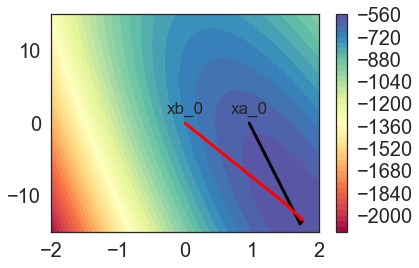

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

beta_0 = np.linspace(-2, 2, 100)
beta_1 = np.linspace(-15, 15, 100)
# make a meshgrid
b_0, b_1 = np.meshgrid(beta_0, beta_1)

# Log-liklihood from the book
def f(y,z,beta_0, beta_1):
    #print(z.shape)
    beta = np.array([beta_0,beta_1]).reshape(2,1)
    pi = update_pi(z,beta)
    b = -np.log(1-pi)
    return (np.transpose(y).dot(z)).dot(beta)-np.transpose(b).dot(ones)

Zmesh = np.zeros((b_0.shape[0],b_1.shape[0]))

for i in range(b_0.shape[0]):
    for j in range(b_1.shape[0]):
        b0 = b_0[i,j]; b1 = b_1[i,j]
        Zmesh[i,j]=f(y,z,b0,b1)


plt.contourf(b_0,b_1,Zmesh, 40, cmap='Spectral')
plt.colorbar()
plt.plot(beta_xa,beta_ya,'k-')
plt.plot(beta_xb,beta_yb,'r-')
plt.annotate('xa_0', (0.95913,0),textcoords="offset points", xytext=(0,10), ha='center',fontsize=17)
plt.annotate('xb_0', (0,0),textcoords="offset points", xytext=(0,10), ha='center',fontsize=17)

### (2a)